In [295]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [296]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [297]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [298]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

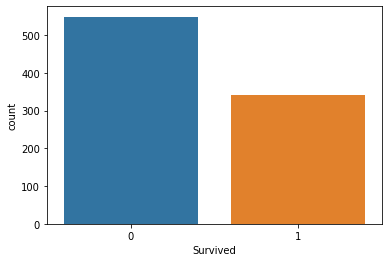

In [299]:
import seaborn as sns
sns.countplot(x='Survived',data=df)

In [300]:
df.Age.isnull().sum()

177

In [301]:
median=df.Age.median()
median

28.0

In [302]:
df.Age.fillna(median,inplace=True)

In [303]:
df.Age.isnull().sum()

0

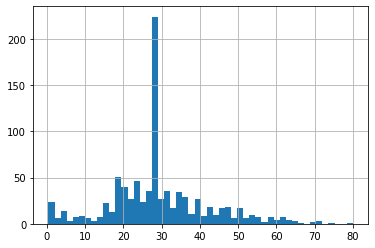

In [304]:
df.Age.hist(bins=50)

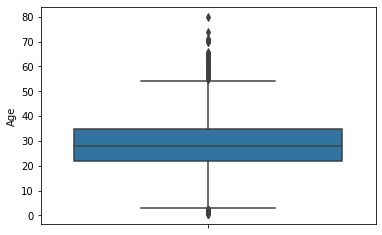

In [305]:
sns.boxplot(y="Age",data=df)

In [306]:
upper_range = df.Age.mean()+3*df.Age.std()
lower_range = df.Age.mean()-3*df.Age.std()
print(upper_range)
print(lower_range)

68.42067214450208
-9.697507161337093


In [307]:
data = df.copy()

In [308]:
data.loc[data["Age"]>=68,'Age']=68

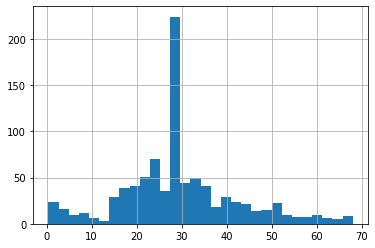

In [309]:
data.Age.hist(bins=30)

In [310]:
df['Age'] = data['Age']

In [311]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


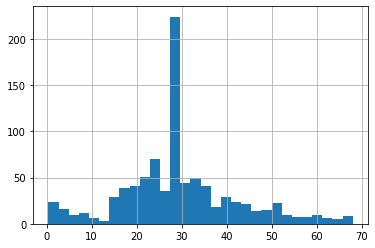

In [312]:
df.Age.hist(bins=30)

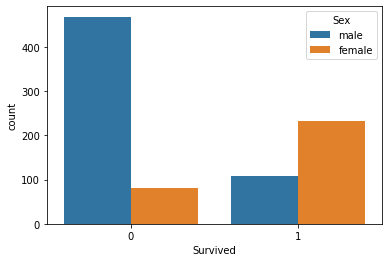

In [313]:
sns.countplot(x='Survived',hue='Sex',data=df)

In [315]:
sex_dummy = pd.get_dummies(df['Sex'])

In [316]:
df = pd.concat([df,sex_dummy],axis=1)

In [317]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [318]:
df.drop(['Sex'],axis=1).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


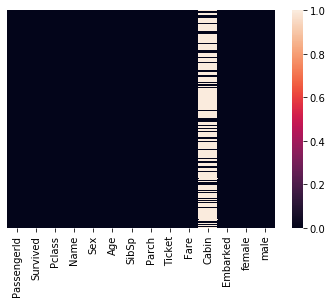

In [319]:
sns.heatmap(df.isnull(),yticklabels=False)

In [320]:
df.Embarked.isnull().sum()

2

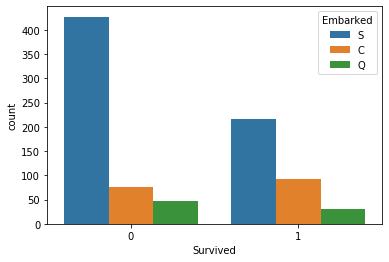

In [321]:
sns.countplot('Survived',hue='Embarked',data=df)

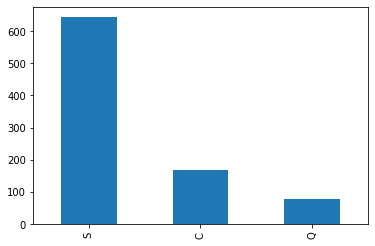

In [322]:
df.Embarked.value_counts().sort_values(ascending=False).plot.bar()

In [323]:
a = df.Embarked.mode()[0]
a

'S'

In [324]:
df.Embarked.fillna(a,inplace=True)

In [325]:
df.Embarked.isnull().sum()

0

In [326]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [327]:
Embarked_dummy = pd.get_dummies(df['Embarked'])

In [328]:
df = pd.concat([df,Embarked_dummy],axis=1)

In [329]:
df.drop(['Embarked'],axis=1).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [330]:
df = df.drop(['PassengerId','Name','Ticket','Sex'],axis=1)

In [331]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,C,Q,S
0,0,3,22.0,1,0,7.2500,NaN,S,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,C85,C,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,NaN,S,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,C123,S,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,NaN,S,0,1,0,0,1


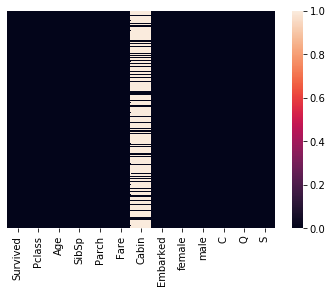

In [332]:
sns.heatmap(df.isnull(),yticklabels=False)

In [333]:
df.Cabin.isnull().sum()

687

In [334]:
df.Cabin.fillna('Missing',inplace=True)

In [335]:
df.Cabin.head()

0    Missing
1        C85
2    Missing
3       C123
4    Missing
Name: Cabin, dtype: object

In [336]:
df.Cabin.isnull().sum()

0

In [337]:
df.Cabin = df.Cabin.astype(str).str[0]

In [338]:
df.Cabin.head()

0    M
1    C
2    M
3    C
4    M
Name: Cabin, dtype: object

In [339]:
df.Cabin.unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [340]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [341]:
a = df.groupby(['Cabin'])['Survived'].mean().sort_values().index
a

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [342]:
b = {k:i for i,k in enumerate(a,0)}
b

{'T': 0, 'M': 1, 'A': 2, 'G': 3, 'C': 4, 'F': 5, 'B': 6, 'E': 7, 'D': 8}

In [343]:
df['Cabin_replaced'] = df['Cabin'].map(b)

In [344]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked,female,male,C,Q,S,Cabin_replaced
0,0,3,22.0,1,0,7.2500,M,S,0,1,0,0,1,1
1,1,1,38.0,1,0,71.2833,C,C,1,0,1,0,0,4
2,1,3,26.0,0,0,7.9250,M,S,1,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,C,S,1,0,0,0,1,4
4,0,3,35.0,0,0,8.0500,M,S,0,1,0,0,1,1


In [345]:
df = df.drop(['Cabin','Embarked'],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,4
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,4
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1


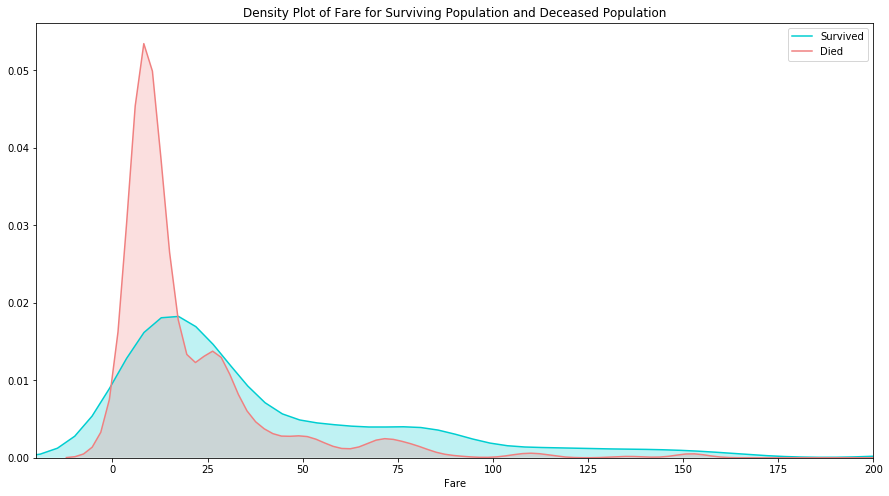

In [346]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(data["Fare"][data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(data["Fare"][data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

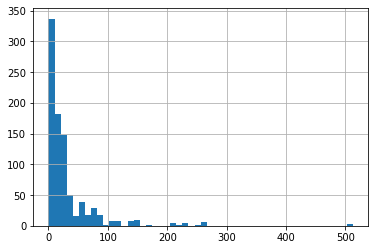

In [347]:
df.Fare.hist(bins=50)

In [348]:
# fair is completely right skewed

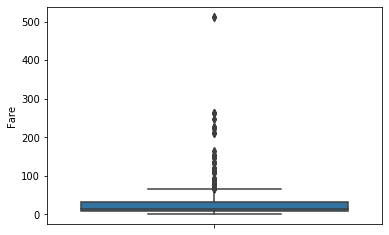

In [349]:
sns.boxplot(y='Fare',data=df)

In [350]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR

23.0896

In [351]:
upper = df.Fare.quantile(0.75) + (IQR*3)
lower = df.Fare.quantile(0.25) - (IQR*3)

In [352]:
print(upper)
print(lower)

100.2688
-61.358399999999996


In [353]:
data1 = df.copy()

In [354]:
data1.loc[data1['Fare']>=100,"Fare"]=100

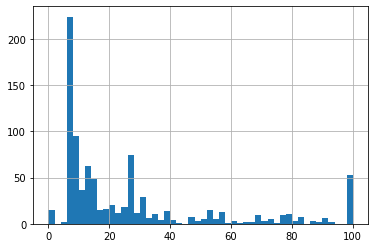

In [355]:
data1.Fare.hist(bins=50)

In [356]:
df['Fare'] = data1['Fare']

In [357]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,4
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,4
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1


(array([ 15.,   0.,   2., 224.,  95.,  37.,  63.,  48.,  15.,  16.,  20.,
         12.,  18.,  74.,  12.,  29.,   6.,  11.,   4.,  14.,   4.,   1.,
          0.,   7.,   3.,   5.,  15.,   5.,  13.,   1.,   3.,   1.,   2.,
          2.,   9.,   3.,   5.,   1.,   9.,  11.,   3.,   7.,   0.,   3.,
          2.,   6.,   2.,   0.,   0.,  53.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.]),
 <a list of 50 Patch objects>)

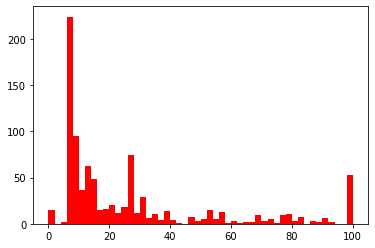

In [358]:
plt.hist(df['Fare'],bins=50,color='red')

In [359]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,4
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,4
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1


In [360]:
df.corr(method='pearson')

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced
Survived,1.000000,-0.338481,-0.065523,-0.035322,0.081629,0.318172,0.543351,-0.543351,0.168240,0.003650,-0.149683,0.328063
Pclass,-0.338481,1.000000,-0.340654,0.083081,0.018443,-0.703170,-0.131900,0.131900,-0.243292,0.221009,0.074053,-0.660275
Age,-0.065523,-0.340654,1.000000,-0.234208,-0.172929,0.138928,-0.079905,0.079905,0.030453,-0.031644,-0.006765,0.232519
SibSp,-0.035322,0.083081,-0.234208,1.000000,0.414838,0.270168,0.114631,-0.114631,-0.059528,-0.026354,0.068734,-0.041693
Parch,0.081629,0.018443,-0.172929,0.414838,1.000000,0.263532,0.245489,-0.245489,-0.011069,-0.081228,0.060814,0.028468
Fare,0.318172,-0.703170,0.138928,0.270168,0.263532,1.000000,0.240352,-0.240352,0.284606,-0.155027,-0.151768,0.561440
female,0.543351,-0.131900,-0.079905,0.114631,0.245489,0.240352,1.000000,-1.000000,0.082853,0.074115,-0.119224,0.160274
male,-0.543351,0.131900,0.079905,-0.114631,-0.245489,-0.240352,-1.000000,1.000000,-0.082853,-0.074115,0.119224,-0.160274
C,0.168240,-0.243292,0.030453,-0.059528,-0.011069,0.284606,0.082853,-0.082853,1.000000,-0.148258,-0.782742,0.185933
Q,0.003650,0.221009,-0.031644,-0.026354,-0.081228,-0.155027,0.074115,-0.074115,-0.148258,1.000000,-0.499421,-0.121189


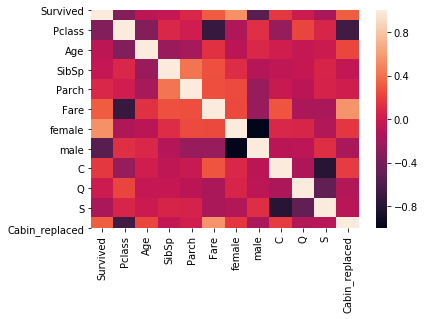

In [361]:
sns.heatmap(df.corr(method='pearson'))

In [362]:
bins=[0,18,40,100]
labels=['Kid','Adult','Old']
df['Age']=pd.cut(df['Age'],bins=bins,labels=labels,right=False)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced
0,0,3,Adult,1,0,7.2500,0,1,0,0,1,1
1,1,1,Adult,1,0,71.2833,1,0,1,0,0,4
2,1,3,Adult,0,0,7.9250,1,0,0,0,1,1
3,1,1,Adult,1,0,53.1000,1,0,0,0,1,4
4,0,3,Adult,0,0,8.0500,0,1,0,0,1,1


In [363]:
df.Age.unique()

[Adult, Old, Kid]
Categories (3, object): [Kid < Adult < Old]

In [364]:
Age_dummy = pd.get_dummies(df['Age'])

In [365]:
df = pd.concat([df,Age_dummy],axis=1)

In [366]:
df = df.drop(['Age'],axis=1)
df.head()

,Survived,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced,Kid,Adult,Old
0,0,3,1,0,7.2500,0,1,0,0,1,1,0,1,0
1,1,1,1,0,71.2833,1,0,1,0,0,4,0,1,0
2,1,3,0,0,7.9250,1,0,0,0,1,1,0,1,0
3,1,1,1,0,53.1000,1,0,0,0,1,4,0,1,0
4,0,3,0,0,8.0500,0,1,0,0,1,1,0,1,0


In [367]:
X = df.drop(['Survived'],axis=1)
y = df['Survived']

In [368]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [369]:
X_train.head()

,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced,Kid,Adult,Old
6,1,0,0,51.8625,0,1,0,0,1,7,0,0,1
718,3,0,0,15.5000,0,1,0,1,0,1,0,1,0
685,2,1,2,41.5792,0,1,1,0,0,1,0,1,0
73,3,1,0,14.4542,0,1,1,0,0,1,0,1,0
882,3,0,0,10.5167,1,0,0,0,1,1,0,1,0


In [370]:
X_test.head()

,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced,Kid,Adult,Old
709,3,1,1,15.2458,0,1,1,0,0,1,0,1,0
439,2,0,0,10.5000,0,1,0,0,1,1,0,1,0
840,3,0,0,7.9250,0,1,0,0,1,1,0,1,0
720,2,0,1,33.0000,1,0,0,0,1,1,1,0,0
39,3,1,0,11.2417,1,0,1,0,0,1,1,0,0


In [371]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [373]:
y_train.head()

6      0
718    0
685    0
73     0
882    0
Name: Survived, dtype: int64

In [374]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, [3]] = sc.fit_transform(X_train.iloc[:, [3]])
X_test.iloc[:, [3]] = sc.transform(X_test.iloc[:, [3]])

C:\Users\korla\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\korla\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [375]:
X_train.head()

,Pclass,SibSp,Parch,Fare,female,male,C,Q,S,Cabin_replaced,Kid,Adult,Old
6,1,0,0,0.943430,0,1,0,0,1,7,0,0,1
718,3,0,0,-0.420093,0,1,0,1,0,1,0,1,0
685,2,1,2,0.557826,0,1,1,0,0,1,0,1,0
73,3,1,0,-0.459308,0,1,1,0,0,1,0,1,0
882,3,0,0,-0.606957,1,0,0,0,1,1,0,1,0


In [376]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()


In [377]:
reg.fit(X_train,y_train)

C:\Users\korla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [378]:
y_train_pred = reg.predict(X_train)
y_train_pred[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [379]:
y_train[:10]

6      0
718    0
685    0
73     0
882    0
328    1
453    1
145    0
234    0
220    1
Name: Survived, dtype: int64

In [380]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [381]:
accuracy_score(y_train,y_train_pred)

0.8087248322147651

In [382]:
confusion_matrix(y_train,y_train_pred)

array([[324,  50],
       [ 64, 158]], dtype=int64)

In [383]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       374
           1       0.76      0.71      0.73       222

    accuracy                           0.81       596
   macro avg       0.80      0.79      0.79       596
weighted avg       0.81      0.81      0.81       596



In [385]:
y_test_pred = reg.predict(X_test)
y_test_pred[:10]

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [386]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [387]:
accuracy_score(y_test,y_test_pred)

0.8033898305084746

In [388]:
confusion_matrix(y_test,y_test_pred)

array([[148,  27],
       [ 31,  89]], dtype=int64)

In [389]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       175
           1       0.77      0.74      0.75       120

    accuracy                           0.80       295
   macro avg       0.80      0.79      0.80       295
weighted avg       0.80      0.80      0.80       295

